# **1. PyTorch Training Workflow Fundamentals**


"**Data**" in ML can be **almost anything** that can be imagined such as **table of values** (like a big Excel spreadsheet), **images** of any kind, **videos** (YouTube has lots of data!), **audio** files (like songs or podcasts), **protein structures**, **text** and more.

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)

ML has two major parts:
> 1) turning the data into a **representative set of numerical values** and

> 2) building a model to **learn the representation** as best as possible



The standard PyTorch workflow (can be chopped and changed as necessary) covers the outline of steps).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>



To be covered topics are:

| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be almost anything but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to learn patterns in the data including choosing a **loss function**, **optimizer** and build a **training loop**. |
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Evaluating model and predictions (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |

In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Initially, we will use linear regression to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

# **2. Gradient Descent**

Gradient descent is an iterative **optimization algorithm** commonly used in machine learning and neural networks. It enables to adjust the model **parameters (weights and biases)** in the direction of the steepest descent of the **difference between the predicted output and the actual target output** (called **error** or **loss** function).


Given $\mathbf{X}_{n\times k}=(-\mathbf{x}_1-,-\mathbf{x}_2-,\cdots,-\mathbf{x}_n-)'$, $\mathbf{y}_{n\times 1}=(y_1,y_2,\cdots,y_n)'$.

$\alpha$


Four steps:
* **Initialization**: The algorithm starts by initializing the model parameters with some initial values: $w_j\sim \cal{N}(0,1), \forall j⇒\mathbf{w}=(\mathbf{w}_1,\mathbf{w}_2,\cdots,\mathbf{w}_n)'$.

* **1. Forward Pass (Prediction)**: In the forward pass, the input data is fed into the neural network through the layers (each layer applies a set of parameters (weights and biases) and an activation function) and then provides the output of the network as a predicted output.

$$\hat{y}\leftarrow\mathbf{X}'\mathbf{w}$$

* **2. Loss Calculation**: The loss (also called cost or criterion) function quantifies the **difference between the predicted output and the actual target output**.
  $$loss\leftarrow\ell(\mathbf{w})=\frac{1}{n}|\hat{y}-y| \\
  loss\leftarrow\ell(\mathbf{w})=\frac{1}{n}(\hat{y}-y)^2 $$

* **3. Backward Pass (Gradient Computation)**: In the backward pass, the **gradients of the loss function with respect to the parameters** (weights and biases) of the neural network are computed. This involves calculating the **partial derivatives of the loss function with respect to each parameter** (weight and bias). The goal of backpropagation is to **minimize this loss**.
$$\nabla \mathbf{w}\leftarrow\frac{\partial \ell(\mathbf{w})}{\partial \mathbf{w}}$$

* **4. Parameters Update**: The **computed gradients are then used to update the parameters** (weights and biases) of the model. This is done using an optimization algorithm, such as **gradient descent**. The weights and biases are adjusted in the opposite direction of the gradients to minimize the loss.
$$\mathbf{w}\leftarrow \mathbf{w} - \alpha \times \nabla \mathbf{w}$$
This step should not be part of the computational graph.

  Larger **learning rate** ($\alpha$) means the optimizer will try larger updates (if too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (if too small and the optimizer will take too long to find the ideal values). The learning rate is considered a **hyperparameter**. Common starting values for the learning rate are `0.01`, `0.001`, `0.0001`, however, these can also be adjusted over time (this is called [learning rate scheduling](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

The steps 1-4 are repeated for a **specified number of iterations (called epochs)** or until the loss is minimized to a satisfactory level. Each iteration consists of a **forward pass**, **loss calculation**, **backward pass** and **parameters update**.

## **2.1. Single Point Approximation**
Let's start small begining with a point, given $x=1$ and $y=2$.

Linear regression: `y = w * x`. Here consider : `2 = 1 * x`.

Then, let see if we can build a Numpy and PyTorch models that can find the optimal value of $w$ such that it can approximate $y=2$ for given $x=1$: $y=wx \Rightarrow 2\approx w \times 1$.



#### **Using Numpy**

Algorithm steps:

* **1. Forward Pass (Prediction)**:  Manually
* **2. Loss Calculation**:  Manually
* **3. Backward Pass (Gradient Computation)**:  Manually
* **4. Parameters Update (Optimizer)**:  Manually

**Initialization**: $x=1,y=2$, $lr=0.01$; initial $w=1$

In [ ]:
x = np.array(1.0)
print(f"x: {x}")
y = np.array(2.0)
print(f"y: {y}")
w = np.array(1.0) # parameter to be optimized
print(f"w: {w}")
lr = 0.01
print(f"lr: {lr}")

x: 1.0
y: 2.0
w: 1.0
lr: 0.01


**1. Forward pass**: $\hat{y} \leftarrow \mathbf{x}'\mathbf{w}$

In [ ]:
y_hat= w * x
print(f"predicted: {y_hat}")

predicted: 1.0


**2. Calculate loss**: $loss\leftarrow\ell(\mathbf{w})=(\hat{y}-y)^2 $

In [ ]:
loss = (y_hat - y)**2
print(f"Loss: {loss}")

Loss: 1.0


**3. Backward pass**: $\Delta \mathbf{w}\leftarrow \frac{\partial loss}{\partial \mathbf{w}}$

In [ ]:
dw = 2*(y_hat - y)
print(f"dw: {dw}")

dw: -2.0


**4. Parameters update**: $\mathbf{w}\leftarrow \mathbf{w} - \alpha \times \Delta \mathbf{w}$

In [ ]:
w -= lr * dw

All steps in one in a for loop

In [ ]:
x = np.array(1.0)
print(f"x: {x}")
y = np.array(2.0)
print(f"y: {y}")
w = 1 # parameter initialized
print(f"w: {w}")
lr = 0.01
print(f"lr: {lr}")

num_steps = 10
for step in range(1, num_steps + 1):
  y_hat= w * x            # 1. Forward pass
  loss = (y_hat - y)**2   # 2. Loss calculation
  dw = 2*(y_hat - y)      # 3. Backward pass
  w -= lr * dw            # 4. Parameters update

  print(f"Step: {step}, predicted: {y_hat:.2f}, Loss: {loss:.3f}, w: {w:.4f}, dw: {dw:.5f}")
print(f"Final w: {w:.3f}")


x: 1.0
y: 2.0
w: 1
lr: 0.01
Step: 1, predicted: 1.00, Loss: 1.000, w: 1.0200, dw: -2.00000
Step: 2, predicted: 1.02, Loss: 0.960, w: 1.0396, dw: -1.96000
Step: 3, predicted: 1.04, Loss: 0.922, w: 1.0588, dw: -1.92080
Step: 4, predicted: 1.06, Loss: 0.886, w: 1.0776, dw: -1.88238
Step: 5, predicted: 1.08, Loss: 0.851, w: 1.0961, dw: -1.84474
Step: 6, predicted: 1.10, Loss: 0.817, w: 1.1142, dw: -1.80784
Step: 7, predicted: 1.11, Loss: 0.785, w: 1.1319, dw: -1.77168
Step: 8, predicted: 1.13, Loss: 0.754, w: 1.1492, dw: -1.73625
Step: 9, predicted: 1.15, Loss: 0.724, w: 1.1663, dw: -1.70153
Step: 10, predicted: 1.17, Loss: 0.695, w: 1.1829, dw: -1.66750
Final w: 1.183


Set the number of steps to 500, and look at the value of the updated parameter, $w$.

#### **Using PyTorch**

Algorithm steps:

* **1. Forward Pass (Prediction)**: Manually
* **2. Loss Calculation**:  Manually
* **3. Backward Pass (Gradient Computation)**:  Manually
* **4. Parameters Update**:  Manually

**Initialization**: $x=1,y=2$, $lr=0.01$; initial $w=1$

In [ ]:
x = torch.tensor(1.0)
print(f"x: {x}")
y = torch.tensor(2.0)
print(f"y: {y}")
w = torch.tensor(1.0, requires_grad=True) # parameter initialized => 'requires_grad=True'
print(f"w: {w}")
lr = 0.01
print(f"lr: {lr}")

x: 1.0
y: 2.0
w: 1.0
lr: 0.01


**1. Forward pass**: $\hat{y}\leftarrow\mathbf{x}'\mathbf{w}$

In [ ]:
y_hat= w * x
print(f"predicted: {y_hat}")

predicted: 1.0


**2. Calculate loss**: $loss\leftarrow\ell(\mathbf{w})=(\hat{y}-y)^2 $

In [ ]:
loss = (y_hat - y)**2
print(f"Loss: {loss}")

Loss: 1.0


**3. Backward pass**: $\Delta \mathbf{w}\leftarrow\frac{\partial loss}{\partial \mathbf{w}}$

In [ ]:
dw = 2*(y_hat - y)
print(f"dw: {dw}")

dw: -2.0


**4. Parameters update**: $\mathbf{w}\leftarrow \mathbf{w} - \alpha \times \Delta \mathbf{w}$

In [ ]:
with torch.no_grad():
    w -= lr * dw

All in one in a for loop.

In [ ]:
x = np.array(1.0)
print(f"x: {x}")
y = np.array(2.0)
print(f"y: {y}")
torch.manual_seed(42)
w = np.random.uniform(1) # parameter initialized
print(f"w: {w}")
lr = 0.01
print(f"lr: {lr}")

num_steps = 10
for step in range(1, num_steps + 1):
  y_hat= w * x            # 1. Forward pass
  loss = (y_hat - y)**2   # 2. Loss calculation
  dw = 2*(y_hat - y)      # 3. Backward pass
  w -= lr * dw            # 4. Parameters update

  print(f"Step: {step}, predicted: {y_hat:.2f}, Loss: {loss:.3f}, w: {w:.4f}, dw: {dw:.5f}")
print(f"Final w: {w:.3f}")


x: 1.0
y: 2.0
w: 1.0
lr: 0.01
Step: 1, predicted: 1.00, Loss: 1.000, w: 1.0200, dw: -2.00000
Step: 2, predicted: 1.02, Loss: 0.960, w: 1.0396, dw: -1.96000
Step: 3, predicted: 1.04, Loss: 0.922, w: 1.0588, dw: -1.92080
Step: 4, predicted: 1.06, Loss: 0.886, w: 1.0776, dw: -1.88238
Step: 5, predicted: 1.08, Loss: 0.851, w: 1.0961, dw: -1.84474
Step: 6, predicted: 1.10, Loss: 0.817, w: 1.1142, dw: -1.80784
Step: 7, predicted: 1.11, Loss: 0.785, w: 1.1319, dw: -1.77168
Step: 8, predicted: 1.13, Loss: 0.754, w: 1.1492, dw: -1.73625
Step: 9, predicted: 1.15, Loss: 0.724, w: 1.1663, dw: -1.70153
Step: 10, predicted: 1.17, Loss: 0.695, w: 1.1829, dw: -1.66750
Final w: 1.183


Set the number of steps to 500, and look at the value of the updated parameter, $w$.

## **2.2. Extending to Straight Line**

Now let us look at a straight line. And we see if we can build a PyTorch model that learns the **pattern of the straight line** and matches it. This time, let us functionalize each step.

#### **Using Numpy**

Algorithm steps:

* **1. Forward Pass (Prediction)**:  Manually
* **2. Loss Calculation**:  Manually
* **3. Backward Pass (Gradient Computation)**:  Manually
* **4. Parameters Update**:  Manually

Linear regression: $y=wx \Rightarrow y\approx 2x \Rightarrow 2\approx w \times 2$.

In [ ]:
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)
n = len(x)

In [ ]:
# 1. Forward pass / prediction
def forward(x):
  return w * x

# 2. Loss calculation / MSE
def MSE_loss(y_pred, y):
  return np.sum((y_pred - y)**2) / n

# 3. Gradient computation
def gradient(x, y_pred, y):
  return np.sum(2 * x * (y_pred - y)) / n

# 4. Parameter update/ optimizer
def parameters_update(w, lr):
  w -= lr * dw
  return w

**Training loop**

In [ ]:
lr = 0.01
epochs = 20

w = 0.0 # parameter initialized

for epoch in range(1, epochs + 1):
  y_pred = forward(x)             # 1. Forward pass / prediction
  loss = MSE_loss(y_pred, y)      # 2. Loss calculation / MSE
  dw = gradient(x, y_pred, y)     # 3. Gradient computation
  w = parameters_update(w, lr)    # 4. Parameter update/ optimizer
  print(f'Epoch {epoch}: w = {w:.3f}, loss = {loss:.5f}')

Epoch 1: w = 0.300, loss = 30.00000
Epoch 2: w = 0.555, loss = 21.67500
Epoch 3: w = 0.772, loss = 15.66019
Epoch 4: w = 0.956, loss = 11.31449
Epoch 5: w = 1.113, loss = 8.17472
Epoch 6: w = 1.246, loss = 5.90623
Epoch 7: w = 1.359, loss = 4.26725
Epoch 8: w = 1.455, loss = 3.08309
Epoch 9: w = 1.537, loss = 2.22753
Epoch 10: w = 1.606, loss = 1.60939
Epoch 11: w = 1.665, loss = 1.16279
Epoch 12: w = 1.716, loss = 0.84011
Epoch 13: w = 1.758, loss = 0.60698
Epoch 14: w = 1.794, loss = 0.43854
Epoch 15: w = 1.825, loss = 0.31685
Epoch 16: w = 1.851, loss = 0.22892
Epoch 17: w = 1.874, loss = 0.16540
Epoch 18: w = 1.893, loss = 0.11950
Epoch 19: w = 1.909, loss = 0.08634
Epoch 20: w = 1.922, loss = 0.06238


#### **Using PyTorch**

Algorithm steps:

* **1. Forward Pass (Prediction)**: Manually
* **2. Loss Calculation**:  Manually
* **3. Backward Pass (Gradient Computation)**:  Manually
* **4. Parameters Update**:  Manually

In the codes below the **numpy arrays are changed to torch tensors**. And, the initialized parameter should get its type and since we are interested in the gradient of the loss w.r.t this parameter, we need to specify `requires_grad=True`.

In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
n = len(x)

In [ ]:
# 1. Forward pass / prediction
def forward(x):
  return w * x

# 2. Loss calculation / MSE
def MSE_loss(y_pred, y):
  return torch.sum((y_pred - y)**2) / n

# 3. Gradient computation
def gradient(x, y_pred, y):
  return torch.sum(2 * x * (y_pred - y)) / n

# 4. Parameter update/ optimizer
def parameters_update(w, lr):
  with torch.no_grad():
    w -= lr * dw
  return w


Remember that the weight update (`w -= lr * dw`) should **not be part of the computational graph**, hence, it should need to be wrapped in `with torch.no_grad():` and that is why we did above in the definition of optimizer.

In [ ]:
lr = 0.01
epochs = 20

w = torch.tensor(0.0, requires_grad=True) # parameter initialized => 'requires_grad=True'

for epoch in range(1, epochs + 1):
  y_pred = forward(x)              # 1. Forward pass / prediction
  loss = MSE_loss(y_pred, y)       # 2. Loss calculation / MSE
  dw = gradient(x, y_pred, y)      # 3. Gradient computation
  w = parameters_update(w, lr)     # 4. Parameter update/ optimizer
  print(f'Epoch {epoch}: w = {w:.3f}, loss = {loss:.5f}')

Epoch 1: w = 0.300, loss = 30.00000
Epoch 2: w = 0.555, loss = 21.67500
Epoch 3: w = 0.772, loss = 15.66019
Epoch 4: w = 0.956, loss = 11.31449
Epoch 5: w = 1.113, loss = 8.17472
Epoch 6: w = 1.246, loss = 5.90623
Epoch 7: w = 1.359, loss = 4.26725
Epoch 8: w = 1.455, loss = 3.08309
Epoch 9: w = 1.537, loss = 2.22753
Epoch 10: w = 1.606, loss = 1.60939
Epoch 11: w = 1.665, loss = 1.16279
Epoch 12: w = 1.716, loss = 0.84011
Epoch 13: w = 1.758, loss = 0.60698
Epoch 14: w = 1.794, loss = 0.43854
Epoch 15: w = 1.825, loss = 0.31685
Epoch 16: w = 1.851, loss = 0.22892
Epoch 17: w = 1.874, loss = 0.16540
Epoch 18: w = 1.893, loss = 0.11950
Epoch 19: w = 1.909, loss = 0.08634
Epoch 20: w = 1.922, loss = 0.06238


# **3. PyTorch Modules**

PyTorch has **four essential modules** you can use to create almost any kind of neural network you can imagine.
They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the **building blocks for computational graphs**. |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, often referred to as **autograd**.  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The **base class** for all neural network modules. To build an NN in PyTorch, the models should subclass `nn.Module` and requires a `forward()` method . |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains optimization algorithms how the model parameters in `nn.Parameter` best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module`. |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the parameters like weights and biases (put these together to make `nn.Module`)
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`
* `torch.optim` contains optimization methods for how to improve the parameters to better represent input data

## **1.3.1. Gradient Computation Using Autograd**

Now let us replace the manual gradient computation of step 3 by the built-in `.backward` neural network function in PyTorch. While computing gradients using this function, the **gradients of all the parameters** are accumulated by default. This gradient accumulation can lead to wrong gradient updates. As a result, another phase for **Zeroing Gradients** ($\Delta \mathbf{w}\leftarrow \mathbf{0}$) is required in order to set **all gradients of the parameters to zero before the backward pass (computing new gradients)** for the next iteration.

Algorithm steps:

* **1. Forward Pass (Prediction)**: Manually
* **2. Loss Calculation**: Manually
* **3. Backward Pass (Gradient Computation)**:  Built-In
* **4. Parameters Update**: Manually
* **5. Zeroing Gradients**:  Manually


In [ ]:
# 1. Forward pass / prediction
def forward(x):
  return w * x

# 2. Loss calculation / MSE
def MSE_loss(y_pred, y):
  return torch.sum((y_pred - y)**2) / n

# 4. Parameter update/ optimizer
def parameters_update(w, lr):
  with torch.no_grad():
    w -= lr * w.grad
  return w

In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

lr = 0.01
epochs = 20
w = torch.tensor(0.0, requires_grad=True) # parameter initialized => 'requires_grad=True'

for epoch in range(1, epochs + 1):
  y_pred = forward(x)             # 1. Forward pass / prediction
  loss = MSE_loss(y_pred, y)      # 2. Loss calculation / MSE
  loss.backward()                 # 3. Gradient computation
  w = parameters_update(w, lr)    # 4. Parameter update/ optimizer
  w.grad.zero_()                  # 5. Zeroing gradients (a must)
  print(f'Epoch {epoch}: w = {w:.3f}, loss = {loss:.5f}')

Epoch 1: w = 0.300, loss = 30.00000
Epoch 2: w = 0.555, loss = 21.67500
Epoch 3: w = 0.772, loss = 15.66019
Epoch 4: w = 0.956, loss = 11.31449
Epoch 5: w = 1.113, loss = 8.17472
Epoch 6: w = 1.246, loss = 5.90623
Epoch 7: w = 1.359, loss = 4.26725
Epoch 8: w = 1.455, loss = 3.08309
Epoch 9: w = 1.537, loss = 2.22753
Epoch 10: w = 1.606, loss = 1.60939
Epoch 11: w = 1.665, loss = 1.16279
Epoch 12: w = 1.716, loss = 0.84011
Epoch 13: w = 1.758, loss = 0.60698
Epoch 14: w = 1.794, loss = 0.43854
Epoch 15: w = 1.825, loss = 0.31685
Epoch 16: w = 1.851, loss = 0.22892
Epoch 17: w = 1.874, loss = 0.16540
Epoch 18: w = 1.893, loss = 0.11950
Epoch 19: w = 1.909, loss = 0.08634
Epoch 20: w = 1.922, loss = 0.06238


In the training loop, we simply call `loss.backward()` to compute the gradient instead of `dw = gradient(x, y, y_pred)`. The `loss.backward()` stores gradients in `grad` attribute of `w`, which can be called as `w.grad`.

Also, as said before, the weight update (`w -= lr * dw`) should **not be part of the computational graph**, hence, we need to wrap it `with torch.no_grad():`.


One more thing, we should also know we **must empty or zero the gradients** again because whenever we call `.backward` it will accumulate the gradients in the `w.grad` attribute. So before the next iteration we want to make sure that the gradients are zero a priori. Hence, the `.zero_()` method, which is is used to zero out the elements of a tensor, is used here as `w.grad.zero_()`.

**Note**: PyTorch training loops can be quite flexible. You may observe slightly different ordering of training steps. Some rules of thumb: **loss calculation** should be *before* the backpropagation, **parameters update** should be *after* performing backpropagation on the loss, and **zero gradients** should be *before*  **parameters update**.

## **1.3.2. Loss Functions and Optimizers**

In adddition to the built-in gradient computation, let us now replace the loss calculation, parameters update step and zeroing gradinents by the built-in neural network functions.

Algorithm steps:

* **1. Forward Pass (Prediction)**: Manually
* **2. Loss Calculation**: Built-In
* **3. Backward Pass (Gradient Computation)**:  Built-In
* **4. Parameters Update**: Built-In
* **5. Zeroing Gradients**:  Built-In


| Function | What does it do? | Where in PyTorch? |
| ----- | ----- | ----- |
| **Loss function** | Measures how wrong model predictions (`y_preds`) wrt  true labels (`y`). | [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions) |
| **Optimizer** | Tells the model how to update its internal parameters to best lower loss. | [`torch.optim`](https://pytorch.org/docs/stable/optim.html) |


Some common values for loss functions are the **MAE (mean absolute error, L1 loss) function** ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)) or **MSE (mean absolute error, L2 loss) function** ([`torch.nn.MSELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)) is usually used for regression problems. The **SGD (stochastic gradient descent)** ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)) or **Adam** ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)) optimizers are also common in different problems.


In [ ]:
# 1. Forward pass / prediction
def forward(x):
  return w * x

In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

criterion = nn.MSELoss()                  # 2. Loss Function - callable function
w = torch.tensor(0.0, requires_grad=True)
lr = 0.01
optimizer = torch.optim.SGD([w], lr=lr)  # 4. Parameters Update: Parameter(s) should be given as a list.

epochs = 20
for epoch in range(1, epochs + 1):
  y_pred = forward(x)             # 1. Forward pass / prediction
  loss = criterion(y_pred, y)     # 2. Loss calculation / MSE
  loss.backward()                 # 3. Gradient computation
  optimizer.step()                # 4. Parameter update/ optimizer
  optimizer.zero_grad()           # 5. Zeroing gradients (a must)
  print(f'Epoch {epoch}: w = {w:.3f}, loss = {loss:.5f}')

Epoch 1: w = 0.300, loss = 30.00000
Epoch 2: w = 0.555, loss = 21.67500
Epoch 3: w = 0.772, loss = 15.66019
Epoch 4: w = 0.956, loss = 11.31449
Epoch 5: w = 1.113, loss = 8.17472
Epoch 6: w = 1.246, loss = 5.90623
Epoch 7: w = 1.359, loss = 4.26725
Epoch 8: w = 1.455, loss = 3.08309
Epoch 9: w = 1.537, loss = 2.22753
Epoch 10: w = 1.606, loss = 1.60939
Epoch 11: w = 1.665, loss = 1.16279
Epoch 12: w = 1.716, loss = 0.84011
Epoch 13: w = 1.758, loss = 0.60698
Epoch 14: w = 1.794, loss = 0.43854
Epoch 15: w = 1.825, loss = 0.31685
Epoch 16: w = 1.851, loss = 0.22892
Epoch 17: w = 1.874, loss = 0.16540
Epoch 18: w = 1.893, loss = 0.11950
Epoch 19: w = 1.909, loss = 0.08634
Epoch 20: w = 1.922, loss = 0.06238


## **1.2.3. Single Layer Neural Networks**

The usual linear regression $y=w_0+w_1x_1+\cdots+w_kx_k$, by default, is represented as a single linear layer NN. Hence, the model (also the parameters) can be defined using a built-in PyTorch function `torch.nn.Linear(in_features, out_features, bias = True)` where the parameter `in_features` is for the number of input features, `out_features` is for the number of features, and `bias = True` is for including the bias in the model by default.

Algorithm steps:

* **1. Forward Pass (Prediction)**: Built-In
* **2. Loss Calculation**: Built-In
* **3. Backward Pass (Gradient Computation)**:  Built-In
* **4. Parameters Update**: Built-In
* **5. Zeroing Gradients**:  Built-In



In [ ]:
xxx = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
yyy = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
print(xxx.shape)
print(yyy.shape)

torch.Size([4])
torch.Size([4])


The varaibles `xxx` and `yyy` have all values in the form of list tensors which is not the appropriate format for PyTorch models that requires both the inputs and outputs to be 2D . Hence, we have to convert to column vector tensors.  Hence, the shape of the input data should be modified as: **rows**: number of examples (for our example, $n=4$), and **columns**: number of features (for our example, $k=1$).

In [ ]:
xx = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
yy = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

Let us observe the shape of the input and output data.

In [ ]:
print(xx, xx.shape)
print(yy, yy.shape)

tensor([[1.],
        [2.],
        [3.],
        [4.]]) torch.Size([4, 1])
tensor([[2.],
        [4.],
        [6.],
        [8.]]) torch.Size([4, 1])


Instead of converting manually which is not feasible way when having larger number of examples, we can use the `.unsqueeze` function.

In [ ]:
x = xxx.unsqueeze(dim = 1)
y = yyy.unsqueeze(dim = 1)
print(xx, xx.shape)
print(yy, yy.shape)

tensor([[1.],
        [2.],
        [3.],
        [4.]]) torch.Size([4, 1])
tensor([[2.],
        [4.],
        [6.],
        [8.]]) torch.Size([4, 1])


In [ ]:
num_examples, num_inputs = x.shape
_, num_outputs = y.shape
print(f"Examples: {num_examples}, Inputs: {num_inputs}, Outputs: {num_outputs}")

Examples: 4, Inputs: 1, Outputs: 1


In [ ]:
model = nn.Linear(in_features = num_inputs, out_features = num_outputs)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [ ]:
w1, w0 = model.parameters()
print(w0)
print(w1)

Parameter containing:
tensor([0.8300], requires_grad=True)
Parameter containing:
tensor([[0.7645]], requires_grad=True)


With the given randomly initialized values, we can predict the output for a given input.

In [ ]:
x_test = torch.tensor([5.0])
y_pred = model(x_test)
y_pred

tensor([4.6527], grad_fn=<AddBackward0>)

In [ ]:
x_test = torch.tensor([5.0])
y_pred = model(x_test).detach()
y_pred

tensor([4.6527])

**Training Loop**

In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32).unsqueeze(dim = 1)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32).unsqueeze(dim = 1)
print("x:", x)
print("y:", y)
num_examples, num_inputs = x.shape
_, num_outputs = y.shape
print(f"Examples: {num_examples}, Inputs: {num_inputs}, Outputs: {num_outputs}")

x: tensor([[1.],
        [2.],
        [3.],
        [4.]])
y: tensor([[2.],
        [4.],
        [6.],
        [8.]])
Examples: 4, Inputs: 1, Outputs: 1


In order to compare the result with the previous exercises, let us set the bias to be 0 by setting `bias = False` in the `nn.Linear(`) function.

Note that while defining the optimizer, we do not need the parameters to be in a list form (like `[w]`), rather we can simply specify using the `.parameters()` method.

In [ ]:
model = nn.Linear(num_inputs, num_outputs, bias = False)
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

epochs = 30
for epoch in range(1, epochs + 1):
  y_pred = model(x)                 # 1. Forward pass / prediction
  loss = nn.MSELoss()(y, y_pred)    # 2. Loss calculation / MSE
  loss.backward()                   # 3. Gradient computation
  optimizer.step()                  # 4. Parameter update/ optimizer
  optimizer.zero_grad()             # 5. Zeroing gradients (a must)

  print(f'Epoch {epoch}: loss = {loss:.5f}', loss)
print(f"Final w = {list(model.parameters())}")

Epoch 1: loss = 37.43980 tensor(37.4398, grad_fn=<MseLossBackward0>)
Epoch 2: loss = 27.05026 tensor(27.0503, grad_fn=<MseLossBackward0>)
Epoch 3: loss = 19.54381 tensor(19.5438, grad_fn=<MseLossBackward0>)
Epoch 4: loss = 14.12040 tensor(14.1204, grad_fn=<MseLossBackward0>)
Epoch 5: loss = 10.20199 tensor(10.2020, grad_fn=<MseLossBackward0>)
Epoch 6: loss = 7.37094 tensor(7.3709, grad_fn=<MseLossBackward0>)
Epoch 7: loss = 5.32550 tensor(5.3255, grad_fn=<MseLossBackward0>)
Epoch 8: loss = 3.84768 tensor(3.8477, grad_fn=<MseLossBackward0>)
Epoch 9: loss = 2.77995 tensor(2.7799, grad_fn=<MseLossBackward0>)
Epoch 10: loss = 2.00851 tensor(2.0085, grad_fn=<MseLossBackward0>)
Epoch 11: loss = 1.45115 tensor(1.4511, grad_fn=<MseLossBackward0>)
Epoch 12: loss = 1.04846 tensor(1.0485, grad_fn=<MseLossBackward0>)
Epoch 13: loss = 0.75751 tensor(0.7575, grad_fn=<MseLossBackward0>)
Epoch 14: loss = 0.54730 tensor(0.5473, grad_fn=<MseLossBackward0>)
Epoch 15: loss = 0.39542 tensor(0.3954, grad_fn

Set the number of epochs to 100 and observe the difference.

Had we set the bias not to be excluded, the final output is even at 100 iterations will not perfect. So we may need to play around the **the learning rate and/or number of epochs** hyperparameters. I hope that it will figure out the bias to close to zero and the slope to be close to 2. Overall this is how we can construct the whole training pipline.



Let us now replace `model = nn.Linear(num_inputs, num_outputs, bias = False)` and create the model using an OOP structure using `nn.Module`.

In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32).unsqueeze(dim = 1)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32).unsqueeze(dim = 1)
print("x:", x)
print("y:", y)
num_examples, num_inputs = x.shape
_, num_outputs = y.shape
print(f"Examples: {num_examples}, Inputs: {num_inputs}, Outputs: {num_outputs}")

x: tensor([[1.],
        [2.],
        [3.],
        [4.]])
y: tensor([[2.],
        [4.],
        [6.],
        [8.]])
Examples: 4, Inputs: 1, Outputs: 1


Model definition

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.linear_layer = nn.Linear(input_dim, output_dim, bias = False) # one layer

  def forward(self, x):                                   # forward pass
    return self.linear_layer(x)

Let us now create the model instace and specify the optimizer.

In [ ]:
model = LinearRegression(num_inputs, num_outputs)
model.parameters()

The output provided, like `generator object Module.parameters at 0x7fc3b30bc9e0>`, represents a generator object in Python refering to the parameters generator object belonging to a PyTorch module.

In PyTorch, a module refers to a component or a building block of a neural network model. Modules can contain various layers, operations, or sub-modules. The `parameters` method is a built-in function in PyTorch modules that returns an iterator over the trainable parameters of the module.

To work with the generator object and access the parameters, we can use it in a **loop** or convert it to a **list**.

In [ ]:
model = LinearRegression(num_inputs, num_outputs)
list(model.parameters())

[Parameter containing:
 tensor([[0.9186]], requires_grad=True)]

In [ ]:
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
epochs = 30

for epoch in range(1, epochs + 1):
  y_pred = model(x)                 # 1. Forward pass / prediction
  loss = nn.MSELoss()(y, y_pred)    # 2. Loss calculation / MSE
  loss.backward()                   # 3. Gradient computation
  optimizer.step()                  # 4. Parameter update/ optimizer
  optimizer.zero_grad()             # 5. Zeroing gradients (a must)

  print(f'Epoch {epoch}: loss = {loss:.5f}', loss)
print(f"Final w = {list(model.parameters())}")

Epoch 1: loss = 8.77051 tensor(8.7705, grad_fn=<MseLossBackward0>)
Epoch 2: loss = 6.33669 tensor(6.3367, grad_fn=<MseLossBackward0>)
Epoch 3: loss = 4.57826 tensor(4.5783, grad_fn=<MseLossBackward0>)
Epoch 4: loss = 3.30779 tensor(3.3078, grad_fn=<MseLossBackward0>)
Epoch 5: loss = 2.38988 tensor(2.3899, grad_fn=<MseLossBackward0>)
Epoch 6: loss = 1.72669 tensor(1.7267, grad_fn=<MseLossBackward0>)
Epoch 7: loss = 1.24753 tensor(1.2475, grad_fn=<MseLossBackward0>)
Epoch 8: loss = 0.90134 tensor(0.9013, grad_fn=<MseLossBackward0>)
Epoch 9: loss = 0.65122 tensor(0.6512, grad_fn=<MseLossBackward0>)
Epoch 10: loss = 0.47051 tensor(0.4705, grad_fn=<MseLossBackward0>)
Epoch 11: loss = 0.33994 tensor(0.3399, grad_fn=<MseLossBackward0>)
Epoch 12: loss = 0.24561 tensor(0.2456, grad_fn=<MseLossBackward0>)
Epoch 13: loss = 0.17745 tensor(0.1775, grad_fn=<MseLossBackward0>)
Epoch 14: loss = 0.12821 tensor(0.1282, grad_fn=<MseLossBackward0>)
Epoch 15: loss = 0.09263 tensor(0.0926, grad_fn=<MseLossB

So far, we have build the model fowwing the steps below:

| Number | Step  | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function computations. | `model(x)` |
| 2 | Loss calculation | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = criterion(y_pred, y)` |
| 3 | Backward pass | Computes gradient of loss with respect for each parameter of the model  (every parameter with `requires_grad=True`).  | `loss.backward()` |
| 4 | Optimizer update | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |
| 5 | Zero gradients | The optimizers gradients are set to zero so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |

# **4. Commmon Activation Functions**

An **activation function** is a crucial component in neural networks and deep learning models. Becasue much of the data to be encountered is non-linear (or a combination of linear and non-linear). It introduces non-linearity to an output of a function, allowing neural networks to learn complex (non-linear) relationships and make more expressive predictions.
PyTorch has a bunch of ready-made [ready-made non-linear activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity).

Some commonly used activation functions include:

* **Sigmoid function (logistic function)**: It squashes the input into a range between 0 and 1, making it suitable for binary classification problems.
* **Hyperbolic tangent (tanh) function**: Similar to the sigmoid function, but squashes the input between -1 and 1, making it suitable for classification tasks.
* **Rectified Linear Unit (ReLU)**: It returns the input if it is positive, and 0 otherwise. ReLU has become popular due to its ability to address the vanishing gradient problem and improve model training.
* **Softmax function**: Typically used in the output layer of a multi-class classification problem, it squashes the inputs into a probability distribution over multiple classes.

In [ ]:
a = torch.arange(-10, 10, 1)
a, a.dtype

(tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
           4,   5,   6,   7,   8,   9]),
 torch.int64)

In [ ]:
a = torch.arange(-10.0, 10, 1)
a, a.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

In [ ]:
a = torch.arange(-10, 10, 1, dtype=torch.float32)
a

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

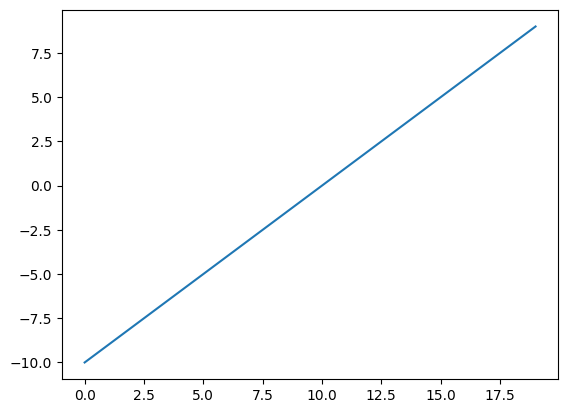

In [ ]:
# Visualize
plt.plot(a);

A straight line, nice. Now let us see how the ReLU activation function influences it.



In [ ]:
torch.relu(a)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

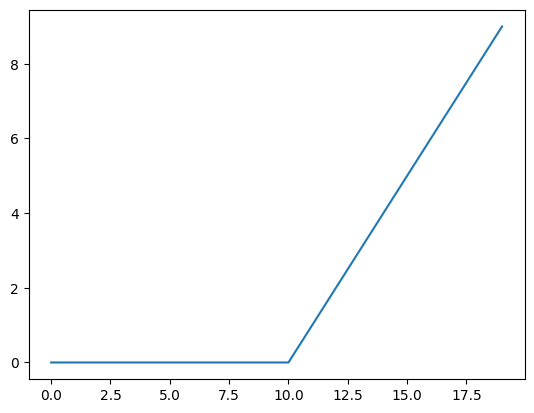

In [ ]:
plt.plot(torch.relu(a));

The ReLU function turns all negatives to 0 and leaves the positive values as they are.

And instead of using PyTorch's ReLU (`torch.nn.ReLU`), let us recreate it ourselves.



In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)  # inputs must be tensors

relu(a)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

How about the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function). The sigmoid function formula goes like:

$$ \sigma (x_i) = \frac{1}{1+e^{-x_i}} $$

Where $\sigma$ stands for sigmoid, $e$ stands for exponential (`torch.exp()`) and $i$ stands for a particular element in a tensor.

Let's build a function to replicate the sigmoid function with PyTorch.

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

sigmoid(a)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

The values all between 0 and 1, looking like probabilities. Let us see what they look like visualized.

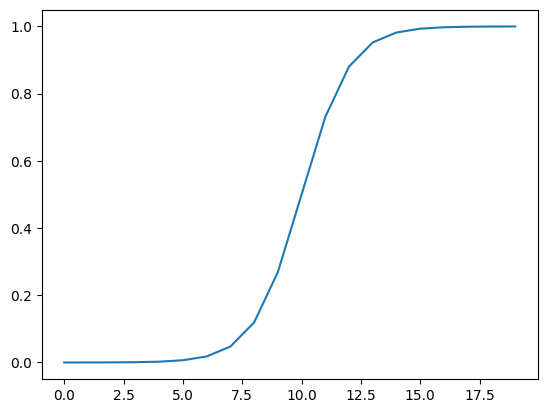

In [ ]:
plt.plot(sigmoid(a));

We have gone from a straight line to a curved line.

Now there are plenty more [non-linear activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) in PyTorch.

But these two are two of the most common.



# **5. Model Building Pipline**

## **5.1. Data Loading and Preprocesing**

Load and preprocess the required dataset. This may involve **resizing**, **normalizing**, and **augmenting** the data.

Split the dataset into training and validation sets.

## **5.2. Split Data into Train and Test Sets**

One of most important steps in a ML project is creating a training and test set (and when required, a validation set).
Each split of the dataset serves a specific purpose:

| Split | Purpose | % data | When |
| ----- | ----- | ----- | ----- |
| **Training set** | The model learns from this data (like learning course materials in a semester). | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data (like taking practice exam before final exam). | ~10-20% | Often |
| **Testing set** | The model gets evaluated on this data to test what it has learned (like taking final exam). | ~10-20% | Always |


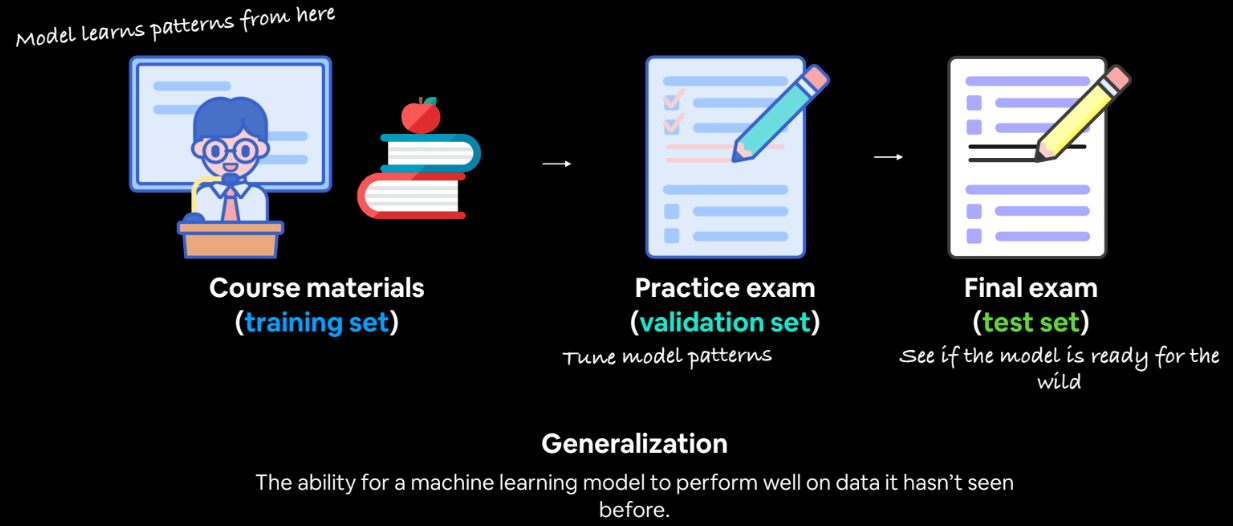


Now, we'll just use a training and test data sets, we can create them by splitting our `X` and `y` tensors.

In [ ]:
X = torch.arange(2, 10, 1.5)
X, X.shape

(tensor([2.0000, 3.5000, 5.0000, 6.5000, 8.0000, 9.5000]), torch.Size([6]))

In [ ]:
X1 = X.unsqueeze(dim=0)
X1, X1.shape

(tensor([[2.0000, 3.5000, 5.0000, 6.5000, 8.0000, 9.5000]]),
 torch.Size([1, 6]))

In [ ]:
X2 = X.unsqueeze(dim=1)
X2, X2.shape

(tensor([[2.0000],
         [3.5000],
         [5.0000],
         [6.5000],
         [8.0000],
         [9.5000]]),
 torch.Size([6, 1]))

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

Beautiful! Now we're going to move towards building a model that can learn the relationship between `X` (**features**) and `y` (**labels**).

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Wonderful, we've got 40 samples for training (`X_train` & `y_train`) and 10 samples for testing (`X_test` & `y_test`).
The model we create is going to try and learn the relationship between `X_train` & `y_train` and then we will evaluate what it learns on `X_test` and `y_test`.

 **Visualization**: Let's create a function to visualize the training data, test data and compare predictions.

In [ ]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # Plot training data in blue
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")    # Plot test data in green

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")   # Plot the predictions in red

  plt.legend(prop={"size": 10}) # Show the legend

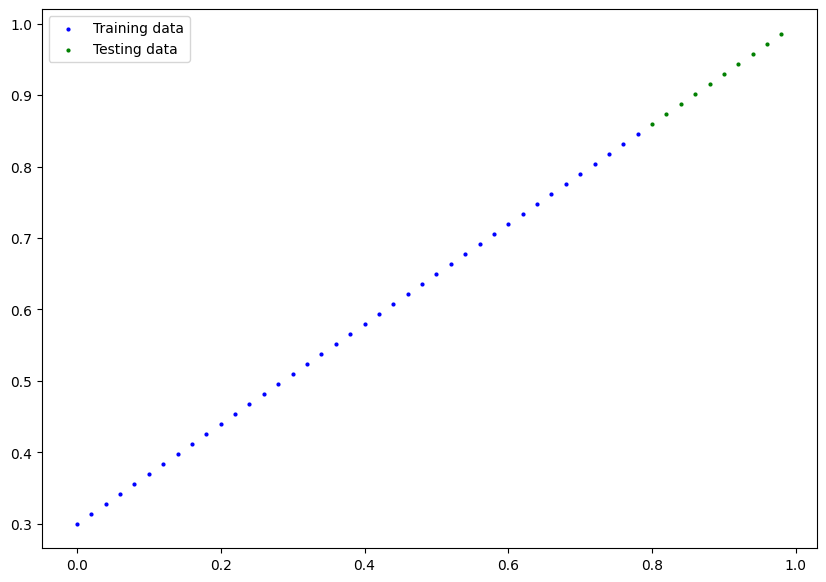

In [ ]:
plot_predictions();


Now instead of just being numbers on a page, our data is a straight line.


## **5.3. Build Model**

### **5.3.1. Define Model Architecture**

To use a model in a deep learning framework like PyTorch or TensorFlow, we first need to define the **model architecture** by specifying the layers, connections, and parameters. This is usually done by creating a class that inherits from a base model class provided by the framework, such as **nn.Module** in PyTorch.

Let us now jump right in replicating a standard linear regression model using pure PyTorch. The basic building blocks a PyTorch model can be created by subclassing the `nn.Module`. Almost all PyTorch models are subclasses of `nn.Module` and requires the **`forward()` method** to be defined as a must.



#### **1) Using `torch.nn.Parameter()`**

Both $w$ and $b$ will be **defined with initialized given or random values**. The values will then be get adjusted as the model learns using an optimization algorithm, say, gradient descent.

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
      super().__init__()
      self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
      self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
      return self.weight * x + self.bias             # <- Forward pass: y = w*x + b


> **Resource:** If unfamiliar with Python class notation, I'd recommend reading [Real Python's Object Orientating programming in Python 3 guide](https://realpython.com/python3-object-oriented-programming/) a few times.



![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)

See more of these essential modules and their uses cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).


##### **Model Instance**

Let's create a model instance with a randomly initialized parameters with the class we've made. We can use a seed for the purpose of reproducibility if needed.

In [ ]:
torch.manual_seed(42)
model = LinearRegressionModel()
model

LinearRegressionModel()

##### **Initialized Parameters**

We can get the state or contents (what the model contains) of the model using [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict). But when the model has several parameters, looking the state dictionary may not be as simple as possible.



In [ ]:
# List named parameters; but not feasible for larger number of parameters
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

Notice how the values for `weight` and `bias` from `model.state_dict()` come out as random float tensors?
This is because we initialized them above using `torch.randn()`.
Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the hardcoded `weight` and `bias` values we set when creating our straight line data).

Let's check its parameters using [`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters).

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model.weight, model.bias

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True))

##### **Prediction/Inference**

When we pass input data in to the model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

In [ ]:
model.forward(torch.tensor(0.4)) # prediction (inference)

tensor([0.2635], grad_fn=<AddBackward0>)

In [ ]:
model(torch.tensor(0.4)) # prediction (inference); same as above b/c nn.Module knows to pass the input via forward

tensor([0.2635], grad_fn=<AddBackward0>)

In [ ]:
model.forward(torch.tensor([0.2, 0.4]).unsqueeze(dim = 1)) # prediction (inference)

tensor([[0.1961],
        [0.2635]], grad_fn=<AddBackward0>)

To make rediction on the entire test data, we can pass it the test data `X_test` to see how closely it predicts `y_test`. But, because the initial model starts with random values, right now it'll have **poor predictive power**.

Let's do it.

In [ ]:
model.forward(X_test) # prediction (inference)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Inference or predictions can be made using using [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) as a [context manager](https://realpython.com/python-with-statement/) (that's what the `with torch.inference_mode():` is) to make the predictions.
As the name suggests, `torch.inference_mode()` is used when using a model for inference (making predictions).

In [ ]:
# %%time
# Make predictions with model
with torch.inference_mode():
    y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Hmm?
`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make **forward-passes** (data going through the `forward()` method) faster.

Our predictions are still numbers on a page, let's visualize them with our `plot_predictions()` function we created above.

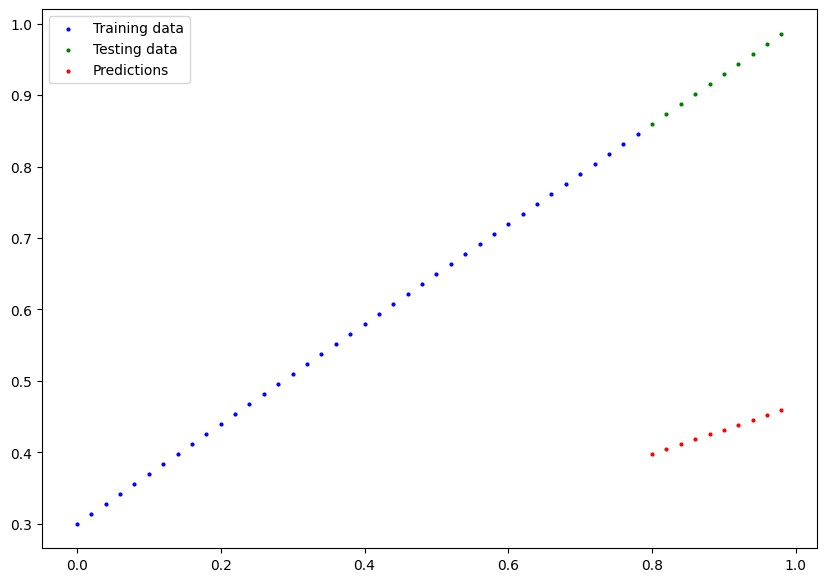

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

Woah! Those predictions look pretty bad...
This make sense though when you remember our model is just using random parameter values to make predictions.
It hasn't even looked at the blue dots to try to predict the green dots.

Time to change that.

**Note:** In older PyTorch code, you may also see `torch.no_grad()` that we have used before being used for prediction/inference. While `torch.inference_mode()` and `torch.no_grad()` do similar things,
`torch.inference_mode()` is newer, potentially faster and preferred. See this [Tweet from PyTorch](https://twitter.com/PyTorch/status/1437838231505096708?s=20) for more.

In [ ]:
# %%time
with torch.no_grad():
  y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

#### **2) Using `torch.nn.Linear()`**

Instead of **defining the weight and bias parameters of the model manually** using `nn.Parameter()`, the function [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) where `in_features` is the **number of dimensions of the input data** and `out_features` is the **number of dimensions of the output** is used usually.


In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.2191]], requires_grad=True), Parameter containing:
tensor([0.2018], requires_grad=True)]


Such use of `nn.Linear()` for creating the model parameters is also called **linear transform**, **fully connected layer**, **dense layer** (in tensor flow).
The figure below shows the difference between defining a linear model using `nn.Parameter` versus using `nn.Linear`.
![comparison of nn.Parameter Linear Regression model and nn.Linear Linear Regression model](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)


Right now the model is making predictions using random parameters to make calculations, it's basically guessing (randomly).
To fix that, we can update its internal parameters (also refer to **parameters** as **patterns**), the `weight` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

For now we could hard code this (since we know the default values `weight=0.7` and `bias=0.3`). But much of the time you won't know what the ideal parameters are for a model and have to write code to see if the model can try and figure them out itself.

### **5.3.2. Instantiating Model**

Instantiating a model refers to creating an instance or an object of a particular model class. In the context of deep learning, a model is typically defined as a neural network architecture that is capable of learning from data and making predictions.

Once the model class is defined, instantiating the model means creating an object of that class. This object represents a specific instance of the model with its unique set of parameters. It can be thought of as a "copy" or "instance" of the model architecture that is ready to be trained or used for inference.

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

### **5.3.3. Loss Function and Optimizer**



In [ ]:
criterion = nn.L1Loss()                                                 # MAE loss
optimizer = torch.optim.SGD(params = model_0.parameters(),  lr = 0.01)  # Create the optimizer
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### **5.3.4. Train Model**

Run following cell by clicking one at a time and observe the reduction in the loss and changes in the value of the parameters

In [ ]:
model_0.train()                     # Put model in training mode (default state of a model)
y_pred = model_0(X_train)           # 1. Forward pass on train data using the forward() method inside
loss = criterion(y_pred, y_train)   # 2. Calculate the loss (how different are the predictions to the ground truth)
optimizer.zero_grad()               # 3. Zero grad of the optimizer
loss.backward()                     # 4. Backpropagtion wrt the parameters
optimizer.step()                    # 5. Perform gradient descent
print(f"Loss: {loss}")
print(model_0.state_dict())

Loss: 0.5551779866218567
OrderedDict([('linear_layer.weight', tensor([[0.7606]])), ('linear_layer.bias', tensor([0.8200]))])


The completion of the training steps (one complete forward and backward propagation) represent one epoch of training. Insteady of re-running every time, the training code can be executed using a for loop.

**Note**: Every time to re-train a model, instantiating the model together with the optimizer is required.

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
criterion = nn.L1Loss()                                                 # MAE loss
optimizer = torch.optim.SGD(params = model_0.parameters(),  lr = 0.01)  # Create the optimizer

In [ ]:
epochs = 100                        # Number of epochs

train_loss_values = []
epoch_count = []

for epoch in range(1, epochs + 1):
  y_pred = model_0(X_train)         # 1. Forward pass on train data using the forward() method inside
  loss = criterion(y_pred, y_train) # 2. Calculate the loss (how different are the predictions to the ground truth)
  loss.backward()                   # 3. Backpropagtion wrt the parameters
  optimizer.step()                  # 4. Perform gradient descent
  optimizer.zero_grad()             # 5. Zero grad of the optimizer


  epoch_count.append(epoch)
  train_loss_values.append(loss.detach().numpy())
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | MAE Loss: {loss}")
    print(model_0.state_dict())

Epoch: 10 | MAE Loss: 0.45148906111717224
OrderedDict([('linear_layer.weight', tensor([[0.7255]])), ('linear_layer.bias', tensor([0.7300]))])
Epoch: 20 | MAE Loss: 0.3362792134284973
OrderedDict([('linear_layer.weight', tensor([[0.6865]])), ('linear_layer.bias', tensor([0.6300]))])
Epoch: 30 | MAE Loss: 0.2210693061351776
OrderedDict([('linear_layer.weight', tensor([[0.6475]])), ('linear_layer.bias', tensor([0.5300]))])
Epoch: 40 | MAE Loss: 0.1058594360947609
OrderedDict([('linear_layer.weight', tensor([[0.6085]])), ('linear_layer.bias', tensor([0.4300]))])
Epoch: 50 | MAE Loss: 0.024698307737708092
OrderedDict([('linear_layer.weight', tensor([[0.5861]])), ('linear_layer.bias', tensor([0.3545]))])
Epoch: 60 | MAE Loss: 0.020298857241868973
OrderedDict([('linear_layer.weight', tensor([[0.6007]])), ('linear_layer.bias', tensor([0.3415]))])
Epoch: 70 | MAE Loss: 0.016866987571120262
OrderedDict([('linear_layer.weight', tensor([[0.6178]])), ('linear_layer.bias', tensor([0.3345]))])
Epoch:

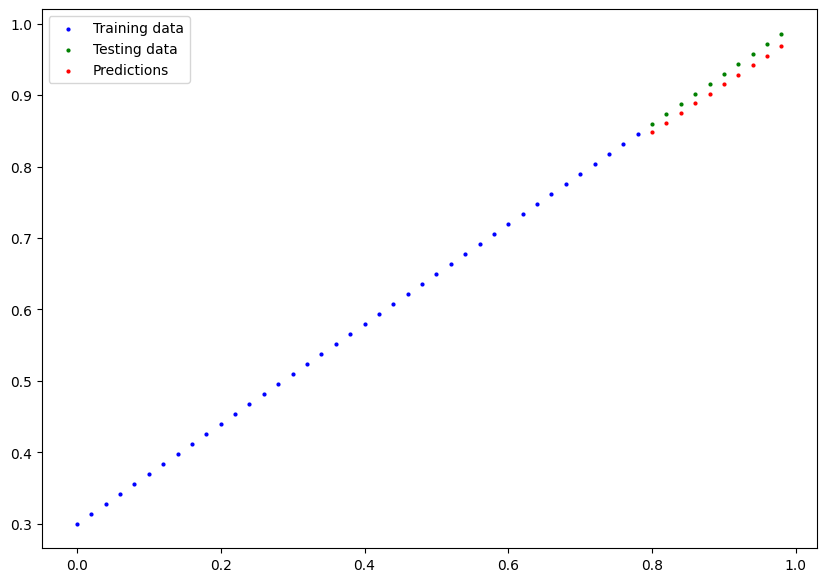

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

The training steps that we have used are:

| Number | Step | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function computations. | `model(x_train)` |
| 2 | Loss calculation | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = criterion(y_pred, y_train)` |
| 3 | Backward pass | Computes the gradient of the loss with respect for each parameter of the model  (each parameter with `requires_grad=True`).  | `loss.backward()` |
| 4 | Optimizer update | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |
| 5 | Zero gradients | The optimizers gradients are set to zero so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |



**Note:** On the ordering of steps, there could be slightly different ways, such as the one showing below might be common.
![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)
Keep in mind that always the **loss function** (`loss = ...`) should be *before* the backpropagation (`loss.backward()`), **parameters update** (`optimizer.step()`)  should be *after* backpropagation, and **zero gradients** (`optimizer.zero_grad()`) should be *before*  **parameters update** (`optimizer.step()`).


### **5.3.5. Test Model**
After training a model, its performance should be evaluated on a separate validation or test set. In this case, the model should be set in evaluation mode using `model.eval()` **before making predictions or computing performance metrics**. This mode disables any training-specific modifications like **dropout** or **batch normalization** in the layers and makes the model operates in the same way it did during training.

As for the testing loop (evaluating our model), the typical steps include:

| Number | Step | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The testing data is passed through the model's `forward()` function once. | `model(x_test)` |
| 2 | Loss calculation | How wrong the predictions on the test set are compared to the ground truth. | `loss = criterion(y_pred, y_test)` |
| 3 | Evaluation metrics (optional) | It calculates evaluation metrics such as accuracy on the test set. | Custom functions |

![pytorch annotated testing loop](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

Notice the testing loop does **not contain backpropagation** (`loss.backward()`), **parameters update** (`optimizer.step()`), this is because **no parameters in the model are being changed** during testing, they've already been calculated. In testing, the only concern is the output of the forward pass through the model.



Let's put all of the above together and train our model for 100 **epochs** (forward passes through the data) and we'll print the evaluation results every 10 epochs.


In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
criterion = nn.L1Loss()                                                 # MAE loss
optimizer = torch.optim.SGD(params = model_0.parameters(),  lr = 0.01)  # Create the optimizer

In [ ]:
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(1, epochs + 1):
  ### Training
  model_0.train()                   #    Training mode - default
  y_pred = model_0(X_train)         # 1. Forward pass on train data using the `forward()` method inside
  loss = criterion(y_pred, y_train) # 2. Calculate the loss
  loss.backward()                   # 3. Backpropagtion wrt the parameters
  optimizer.step()                  # 4. Perform gradient descent
  optimizer.zero_grad()             # 5. Zero gradients of the optimizer

  ### Testing
  model_0.eval()                                               # Evaluation mode
  with torch.inference_mode():
    test_pred = model_0(X_test)                                # 1. Forward pass on test data
    test_loss = criterion(test_pred, y_test.type(torch.float)) # 2. Caculate loss on test data

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 10 | MAE Train Loss: 0.45148906111717224 | MAE Test Loss: 0.45273739099502563 
Epoch: 20 | MAE Train Loss: 0.3362792134284973 | MAE Test Loss: 0.318027526140213 
Epoch: 30 | MAE Train Loss: 0.2210693061351776 | MAE Test Loss: 0.18331770598888397 
Epoch: 40 | MAE Train Loss: 0.1058594360947609 | MAE Test Loss: 0.048607878386974335 
Epoch: 50 | MAE Train Loss: 0.024698307737708092 | MAE Test Loss: 0.046863656491041183 
Epoch: 60 | MAE Train Loss: 0.020298857241868973 | MAE Test Loss: 0.046905118972063065 
Epoch: 70 | MAE Train Loss: 0.016866987571120262 | MAE Test Loss: 0.038632579147815704 
Epoch: 80 | MAE Train Loss: 0.013428186066448689 | MAE Test Loss: 0.030360037460923195 
Epoch: 90 | MAE Train Loss: 0.009996934793889523 | MAE Test Loss: 0.02277437411248684 
Epoch: 100 | MAE Train Loss: 0.006563370116055012 | MAE Test Loss: 0.014501834288239479 


Oh would you look at that! Looks like our loss is going down with every epoch, let's plot it to find out.

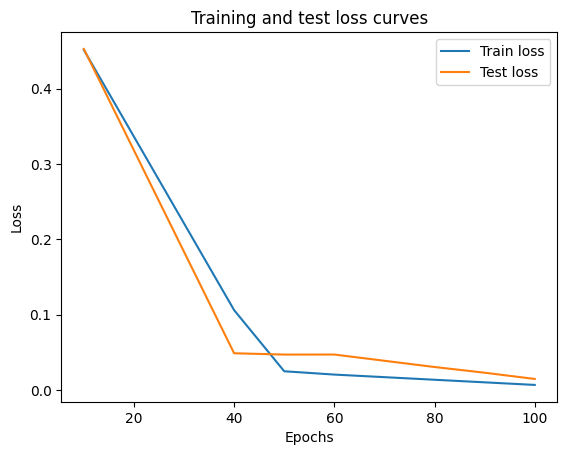

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Nice! The **loss curves** show the loss going down over time. Remember, loss is the measure of **how wrong the model** is, so the lower the better.
Let us inspect our model's [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html) to see see how close our model gets to the original values we set for weights and bias.



In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6691]])), ('linear_layer.bias', tensor([0.3130]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


The model got very close to calculate the exact original values for `weight` and `bias` (and it would probably get even closer if we trained it for longer).

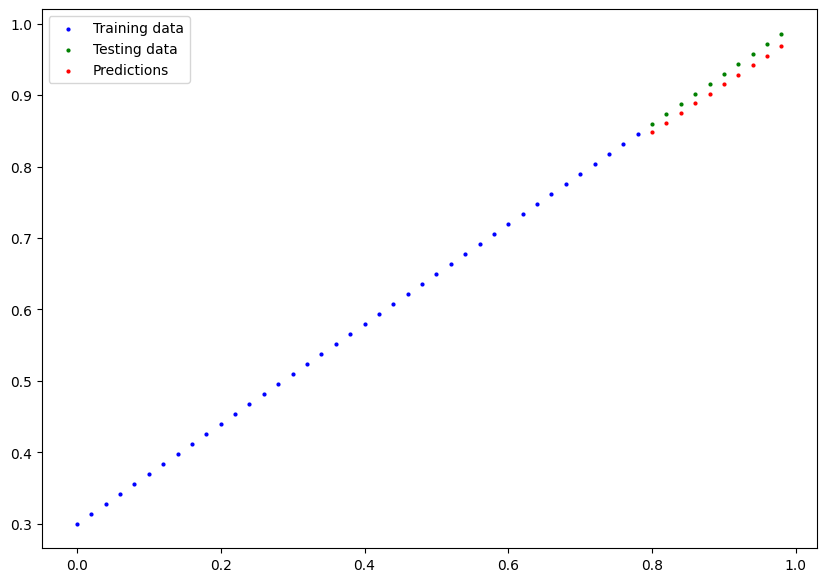

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

> **Exercise:** Try changing the `epochs` value above to 200, what happens to the loss curves and the weights and bias parameter values of the model?

### **5.3.6. Predictions (Inference)**

We have already seen a glimpse of predictions/inference in the training and testing code above, the steps to do it outside of the training/testing loop are similar.

There are three things to remember when making predictions (also called inference) with a PyTorch model:

1. Set the **model in evaluation mode** (`model.eval()`).
2. Make the **predictions using the inference mode** context manager (with `torch.inference_mode(): ...`).
3. All predictions should be made with **objects on the same device** (e.g. both data and model on GPU or both data and model on CPU).

The first two items **turn-off all setting and computations not necessary for inference** for the purpose of faster computation. And the third ensures not to run into **cross-device errors**.

In [ ]:
# # 1. Set the model in evaluation mode
# model_0.eval()    # Not clear for me using both eval mode and inference mode
# 2. Setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8483],
        [0.8617],
        [0.8750],
        [0.8884],
        [0.9018],
        [0.9152],
        [0.9286],
        [0.9420],
        [0.9553],
        [0.9687]])

Nice! We've made some predictions with the trained model, now let us look graphically.

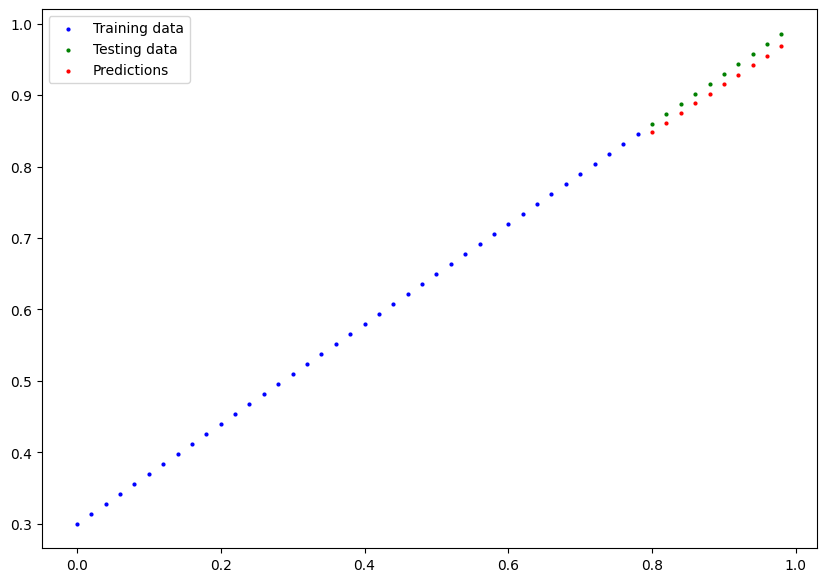

In [ ]:
plot_predictions(predictions=y_preds)

Now those red dots are looking far closer than they were before!

## **5.4. Saving and Loading Models**

For saving and loading models in PyTorch, there are three main methods (more on [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| PyTorch method | What does it do? |
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Saves a serialized object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility.  |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Uses `pickle`'s unpickling features to deserialize and load pickled Python object files into memory. |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. |


#### **Saving a Model's `state_dict()`**

The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

Let's see how we can do that in a few steps:

1. Create a **directory** for saving models to called `models` using Python's `pathlib` module.
2. Create a **file path** to save the model to.
3. Call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

> **Note:** It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`.


In [ ]:
from pathlib import Path

# 1. Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,   # create parent directories if needed
                 exist_ok = True   # if models directory already exists, don't error
                 )

In [ ]:
# 2. Create model save path
MODEL_NAME = "01_PyTorch_Workflow_Model_0.pth" # common PyTorch save convention: '.pt' or '.pth' extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH # Not saved yes, but a path.

PosixPath('Models/01_PyTorch_Workflow_Model_0.pth')

In [ ]:
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: Models/01_PyTorch_Workflow_Model_0.pth


In [ ]:
# Check the saved file path
!ls -l Models # ls is list

total 4
-rw-r--r-- 1 root root 1271 Jun 17 09:41 01_PyTorch_Workflow_Model_0.pth


In [ ]:
!ls -l Models/01_PyTorch_Workflow_Model_0.pth

-rw-r--r-- 1 root root 1271 Jun 17 09:41 Models/01_PyTorch_Workflow_Model_0.pth


#### **Loading a Model's `state_dict()`**

We have now got a saved model `state_dict()` at `Models/01_PyTorch_Workflow_Model_0.pth`. It can be loaded using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`.

Why do we need to call `torch.load()` inside `torch.nn.Module.load_state_dict()`?
Because we only saved the model's `state_dict()` which is a **dictionary of learned parameters** and **not the entire model**. We first have to load the `state_dict()` with `torch.load()` and then pass the `state_dict()` to a new instance of the model (which is a subclass of `nn.Module`).

Why not save the entire model?

[Saving the entire model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more intuitive, however, to quote the PyTorch documentation:

> The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...
> Because of this, your code can break in various ways when used in other projects or after refactors.

So instead, we're using the flexible method of saving and loading just the `state_dict()`, which again is basically a dictionary of model parameters.

Let's test it out by creating another instance of `LinearRegressionModel()`, which is a subclass of `torch.nn.Module` and will hence have the in-built method `load_state_dit()`.

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict() # Randomly initialized parameters

OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
             ('linear_layer.bias', tensor([0.9186]))])

In [ ]:
# Load the state_dict of the saved model (this will update the new instance of the model with trained weights)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model_0.state_dict() # Loaded (pre-trained) version of parameters

OrderedDict([('linear_layer.weight', tensor([[0.6691]])),
             ('linear_layer.bias', tensor([0.3130]))])

It looks like things matched up. Now to test the loaded model, let's perform inference with it (make predictions) on the test data.

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model
y_preds

tensor([[0.8483],
        [0.8617],
        [0.8750],
        [0.8884],
        [0.9018],
        [0.9152],
        [0.9286],
        [0.9420],
        [0.9553],
        [0.9687]])

Now we've made some predictions with the loaded model, let's see if they're the same as the previous predictions.

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

> **Note:** As stated in [Python's `pickle` documentation](https://docs.python.org/3/library/pickle.html), the `pickle` module **is not secure**. That means you should only ever unpickle (load) trusted data and/or models, or from trusted sources you trust.

# **6. Writing Device Agnostic Code**

**Device agnostic**, also known as **platform-agnostic** or **cross-platform**, code refers to programming code that is designed to work seamlessly **across different devices, operating systems, or platforms** regardless of the specific device or platform on which the code is executed.

Here we are going to write **CPU and GPU agnostic code** so that the code is designed to work efficiently and effectively across different types of processors, whether the central processing units (CPUs) or graphics processing units (GPUs). Traditionally, CPUs have been responsible for **general-purpose computing tasks**, while GPUs have been primarily used for **parallel processing** and graphics-intensive applications. However, with the rise of general-purpose GPU programming frameworks such as CUDA (Compute Unified Device Architecture) and OpenCL (Open Computing Language), GPUs can now be utilized for a broader range of computational tasks beyond graphics. This type of code can be particularly useful in scenarios where **performance optimization** is crucial, such as **scientific simulations**, **machine learning**, and **data processing**. It allows developers to take advantage of the high parallel processing capabilities of GPUs while ensuring that the code can still run efficiently on CPUs or other types of processors when GPUs are not available. Frameworks like PyTorch or TensorFlow in the field of machine learning provide abstractions that allow developers to write code that can be executed on CPUs or GPUs interchangeably without significant modifications.


Let us put everything we have done so far together. Except this time we will make the code **device agnostic**: so if there is a GPU available, it will use it and if not, it will default to the CPU.

**Note:**
> If you are using Google Colab, to setup a GPU, go to **Runtime -> Change runtime type -> Hardware acceleration -> GPU**.

> If you do this, it will reset the Colab runtime and you will lose saved variables.

## **6.1. GPU-CPU Selection Code**

Now let's start making our code **device agnostic** by setting `device="cuda"` if it 's available, otherwise it'll default to `device="cpu"`.



In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


If you've got access to a GPU, the above should've printed out:

```
Using device: cuda
```
Otherwise, CPU will be used for the following computations.

## **6.2. Training and Testing Data**

Let's create some data just like before.

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Let us use an 80/20 split for training and 20% testing.

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Let us visualize to make sure the data looks okay.

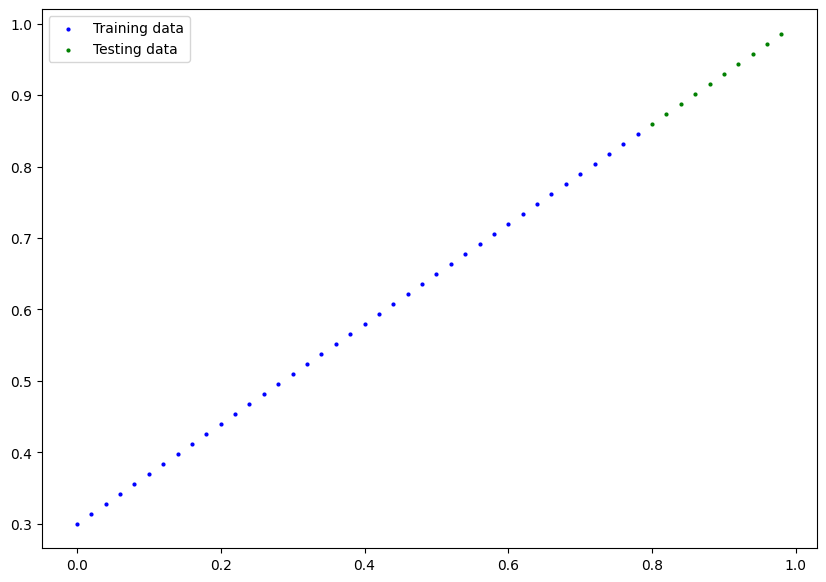

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

After instantiating the model, a **loss function** (`loss=`) to be minimized and an **optimizer** to which the model's parameters (`model.parameters()`) need to be passed to adjust them during training are needed to be specified.

In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
criterion = nn.L1Loss()
print(criterion)
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)
model_1, model_1.state_dict()

L1Loss()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Notice the outputs of `model_1.state_dict()`, the `nn.Linear()` layer created a random `weight` and `bias` parameter.

Now let us check the model's current device using `next()` function that retrieves the next item from an iterator..

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

It looks like the model's on the CPU by default. Let's change it to be on the GPU (if it is available) using `.to(device)`. Following cell works regardless of whether a GPU is available or not, because of the device agnostic code that we have written above.

In [ ]:
model_1.to(device)                  # device already set to be "cuda" if available, "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

Good!

If a CUDA-enabled GPU is accessible, an output of something like: `device(type='cuda', index=0)` printed out.

## **6.3. Training and Testing Loops**

The only different thing in the training and testing steps compared to the previous ones is putting the data on the target `device`.

Note the model is already put on the target `device` using `model_1.to(device)`.
And the same should be done for the **data**.

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

That way if the model is on the GPU, the data is on the GPU (and vice versa). Otherwise, error like `Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!` will occur indicating  not all python objects (model/data) are on the device.

Let's step things up a notch this time and set `epochs=500`.

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

epochs = 500

for epoch in range(1, epochs + 1):
    model_1.train()                   #    train mode is on by default after construction
    y_pred = model_1(X_train)         # 1. Forward pass
    loss = criterion(y_pred, y_train) # 2. Calculate loss
    loss.backward()                   # 4. Loss backward
    optimizer.step()                  # 5. Step the optimizer
    optimizer.zero_grad()             # 3. Zero grad optimizer

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)              # 1. Forward pass
        test_loss = criterion(test_pred, y_test) # 2. Calculate loss

    if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 50 | Train loss: 0.024698307737708092 | Test loss: 0.046863656491041183
Epoch: 100 | Train loss: 0.006563370116055012 | Test loss: 0.014501834288239479
Epoch: 150 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 200 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 250 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 300 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 350 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 400 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 450 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 500 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184


> **Note:** Slightly different results may be observed whether the model was trained on CPU or GPU and other random nature of ML even ifwith same random seed. If the difference is large, look for errors, however, if it is small (ideally it is), ignore it.

Let's check the learned parameters of the model and compare them to the original hard coded parameters.

In [ ]:
from pprint import pprint # pprint = pretty print
print("The model learned values for weight and bias:")
pprint(model_1.state_dict())
print("\nAnd original values for weight and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned values for weight and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

And original values for weight and bias are:
weights: 0.7, bias: 0.3


The learned parameters are close to a perfect model.

## **6.4. Inference (Predictions)**


In [ ]:
# model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

If the predictions are made with data on the GPU, the output will notice `device='cuda:0'` towards the end. That means the data is on CUDA device 0 (the first GPU in the system has access to due to zero-indexing), if using multiple GPUs in the future, this number may be higher.

Now let us plot the model's predictions.

> **Note:** Many data science libraries such as `pandas`, `matplotlib` and `NumPy` **aren't capable of using data that is stored on GPU** and might run into some issues when data not stored on the CPU. To fix this, we can call [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) on the target tensor to return its copy on the CPU.

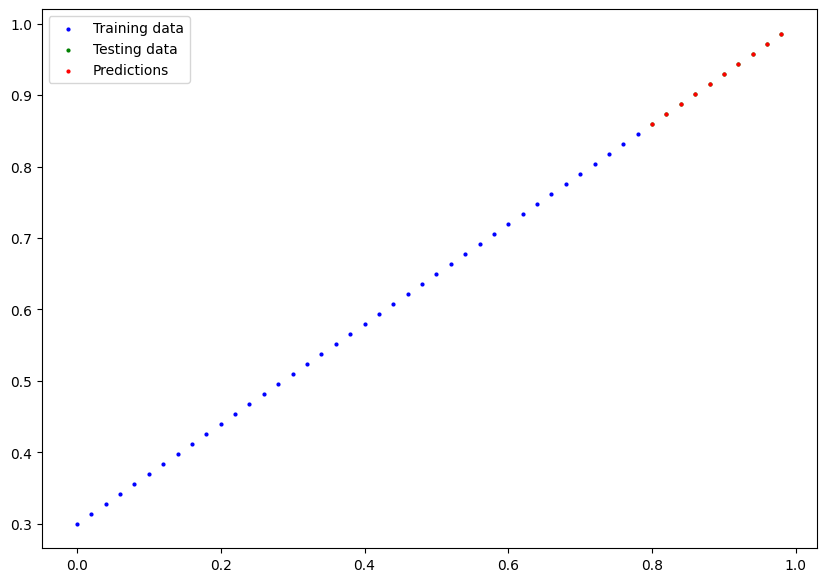

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU
plot_predictions(predictions=y_preds.cpu())

Woah! Look at those red dots, they line up almost perfectly with the green dots. I guess the extra epochs helped.



## **6.5. Saving Trained Model**

Let us save the model to file so it can be used later.



In [ ]:
from pathlib import Path

MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_PyTorch_Workflow_Model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: Models/01_PyTorch_Workflow_Model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## **6.6. Loading Saved Model**

And just to make sure everything worked well, let us load the saved model back in. To do so, remember to create a new instance of the `LinearRegressionModelV2()` class, load in the model state dict using `torch.nn.Module.load_state_dict()` and then send the new instance of the model to the target device (to ensure the code is device-agnostic).

In [ ]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")
pprint(f"Parameters:\n{loaded_model_1.state_dict()}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu
('Parameters:\n'
 "OrderedDict([('linear_layer.weight', tensor([[0.6968]])), "
 "('linear_layer.bias', tensor([0.3025]))])")


## **6.7. Evaluate Loaded Model**

Now we can evaluate the loaded model to see if its predictions line up with the predictions made prior to saving.

In [ ]:
# loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# **7. Multiple Layers Model**

Neural Networks in general are composed of a collection of **neurons** that are organized in **layers**, each with their own learnable **weights and biases**.

> **MY Note**: A **neuron** can be thought of as a function that takes in **multiple inputs and yields a single output**. A **layer** is simply a collection of **neurons with the same operation**, including the **same hyperparameters**.

So far the focus was only on a single layer model for regression problems. Now let us extend to multiple layers NN model.

> **TBC Example (See last part to be modified more)**:
  * Generate circle data $y=\sqrt{1-x^2}+\{\varepsilon\sim \cal{N}(0,0.08)\}$
  * fit an NN model with only linear layers
  * fit a model with activation functions (ReLU) activation


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## **7.1. Define Model**

Let us define  the model subclassing `nn.module` and contained three layers.

In [ ]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 1, out_features = 8)  # takes in 2 features (X), produces 8 features
    self.layer_2 = nn.Linear(in_features = 8, out_features = 1)  # takes in 8 features, produces 1 feature (y)

  def forward(self, x):
    z = self.layer_1(x)  # Input goes through layer_1 - > first computation
    z = self.layer_2(z)  # first computation output goes through layer_2 -> second computation
    return z # computation first goes in layer_1 then its output goes in layer_2

Generally to benefits from speedups where possible instead of one by one saving of the computations, creating a model as follows is the same as above.


In [ ]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 1, out_features = 8)  # takes in 2 features (X), produces 8 features
    self.layer_2 = nn.Linear(in_features = 8, out_features = 1)  # takes in 8 features, produces 1 feature (y)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # computation first goes in layer_1 then its output goes in layer_2

What is going on here?

There are two linear layers. The first `self.layer_1` takes 1 input feature (`in_features = 1`) and produces 8 output features (`out_features = 8`). This is means 8 **hidden neurons (nodes or units)**. This layer turns the input data from having 1 feature to 8 features. Why? This allows the model to learn patterns from 1 value rather than just 2 values, **potentially leading to better outputs** (potentially because sometimes it does not work).

The **number of hidden nodes** in neural network layers is a **hyperparameter** and there is no set in stone value every one has to use. The choice depends on the model type and dataset begin worked with.

The second `self.layer_2` takes 8 hidden nodes (`in_features = 8`)  which are actually the outputs (`out_features = 8`) from `self.layer_1`. The only rule of hidden nodes is that the input nodes for the next layer (`self.layer_2`) has be the same with output nodes (`out_features`) of the previous layer (`self.layer_1`). Lasly, `self.layer_3` performs a linear combinations and turn it to `out_features = 1` (the same shape as `y`).

A visual example of what a similar regression neural network looks like [TensorFlow Playground website](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.43661&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false).*

## **7.2. Instantiate Model and Move to the Target Device**

Let us instantiate the model (create an instance of the model) and send it to the target `device`.

In [ ]:
model_3 = LinearRegressionModelV3().to(device)
model_3

LinearRegressionModelV3(
  (layer_1): Linear(in_features=1, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336],
                      [ 0.8692],
                      [ 0.1872]])),
             ('layer_1.bias',
              tensor([ 0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478, -0.4668,  0.2549])),
             ('layer_2.weight',
              tensor([[-0.1629, -0.0415, -0.1436,  0.2345, -0.2791, -0.1630, -0.0998, -0.2126]])),
             ('layer_2.bias', tensor([0.0334]))])

Note the first layer has $2\times 8=16$ weight parameters (`layer_1.weight`) and 8 biases `layer_1.bias` where as the second layer has $8$ weight parameters (`layer_1.weight`) and 8 biases `layer_1.bias`.

In [ ]:
device # target device

'cpu'

In [ ]:
next(model_3.parameters()).device

device(type='cpu')

We can also define the same model architecture as above using [`nn.Sequential()`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) that performs performs a **forward pass** computation of the input data through the layers in their order of appearance. So let us now replicate `LinearRegressionModelV3` with `nn.Sequential()`.

In [ ]:
model_3 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 8),
    nn.Linear(in_features = 8, out_features = 1)
    )

model_3.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

The definition using `nn.Sequential()` looks much simpler than subclassing `nn.Module`. It **always runs in sequential order** which is fantastic for straight-forward computations. But if other non-straight-forward sequential computations are needed, it is required to define a custom `nn.Module` subclass.

We can also use to define the model subclassing `nn.Module` and using `nn.Sequential()` as:

In [ ]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
      nn.Linear(in_features = 1, out_features = 8),
      nn.Linear(in_features = 8, out_features = 1)
        )

  def forward(self, x):
    return self.model(x)


model_3 = LinearRegressionModelV3().to(device)
model_3

LinearRegressionModelV3(
  (model): Sequential(
    (0): Linear(in_features=1, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)

## **7.3. Predictions With Untrained Model**

Now we have created a model, let us see what happens when we pass some data through it. Note to send the data to the target device.

In [ ]:
untrained_preds = model_3(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 10, Shape: torch.Size([10, 1])
Length of test samples: 10, Shape: torch.Size([10, 1])

First 10 predictions:
tensor([[0.2602],
        [0.2621],
        [0.2640],
        [0.2659],
        [0.2678],
        [0.2697],
        [0.2716],
        [0.2735],
        [0.2754],
        [0.2772]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In the `.inference_mode()`, the gradient in the predictions goes away.

In [ ]:
with torch.inference_mode():
  untrained_preds = model_3(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 10, Shape: torch.Size([10, 1])
Length of test samples: 10, Shape: torch.Size([10, 1])

First 10 predictions:
tensor([[0.2602],
        [0.2621],
        [0.2640],
        [0.2659],
        [0.2678],
        [0.2697],
        [0.2716],
        [0.2735],
        [0.2754],
        [0.2772]])

First 10 test labels:
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


Note that here the predictions are continuous values including positive and negative values similar to the outup variable being used for regression.



Now let us train the model using `nn.L1Loss()` loss function and `torch.optim.SGD()` optimizer as before for 500 iterations`epochs=500`.

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = LinearRegressionModelV3()
model_3.to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.01)

epochs = 500

for epoch in range(1, epochs + 1):
  model_3.train()                   #    train mode is on by default after construction
  y_pred = model_3(X_train)         # 1. Forward pass
  loss = criterion(y_pred, y_train) # 2. Calculate loss
  loss.backward()                   # 4. Loss backward
  optimizer.step()                  # 5. Step the optimizer
  optimizer.zero_grad()             # 3. Zero grad optimizer

  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test)              # 1. Forward pass
    test_loss = criterion(test_pred, y_test) # 2. Calculate loss

  if epoch % 50 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 50 | MAE Train Loss: 0.024476023390889168 | MAE Test Loss: 0.047950319945812225 
Epoch: 100 | MAE Train Loss: 0.024088118225336075 | MAE Test Loss: 0.046593450009822845 
Epoch: 150 | MAE Train Loss: 0.02578452229499817 | MAE Test Loss: 0.04321745038032532 
Epoch: 200 | MAE Train Loss: 0.02747705578804016 | MAE Test Loss: 0.03985074162483215 
Epoch: 250 | MAE Train Loss: 0.027110135182738304 | MAE Test Loss: 0.03848515823483467 
Epoch: 300 | MAE Train Loss: 0.028802653774619102 | MAE Test Loss: 0.03512858599424362 
Epoch: 350 | MAE Train Loss: 0.030490946024656296 | MAE Test Loss: 0.031781770288944244 
Epoch: 400 | MAE Train Loss: 0.030144009739160538 | MAE Test Loss: 0.030408579856157303 
Epoch: 450 | MAE Train Loss: 0.03183181956410408 | MAE Test Loss: 0.027072221040725708 
Epoch: 500 | MAE Train Loss: 0.03150029480457306 | MAE Test Loss: 0.025691306218504906 


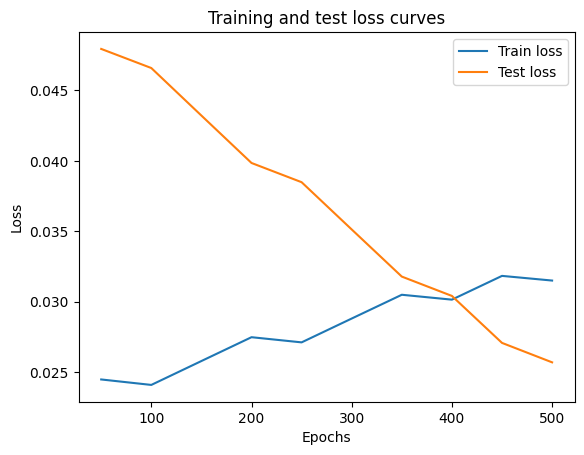

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Try to observe the difference in the output by changing the learning rate; `lr= 0.001`. Also with a `lr = 0.01`, change the loss function to `nn.MSELoss()` and the number of epochs to `epochs=1000`, and then look the changes in the training and testing losses.

Let us plot its predictionso. In doing so, since the model and data may be using GPU as a target `device`, remember that the plotting function will be done using `matplotlib` that cannot handle data on the GPU. As a result, we have to move  all objects to the CPU first. For this purpose, the [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) is used then to pass to `plot_predictions()` function.

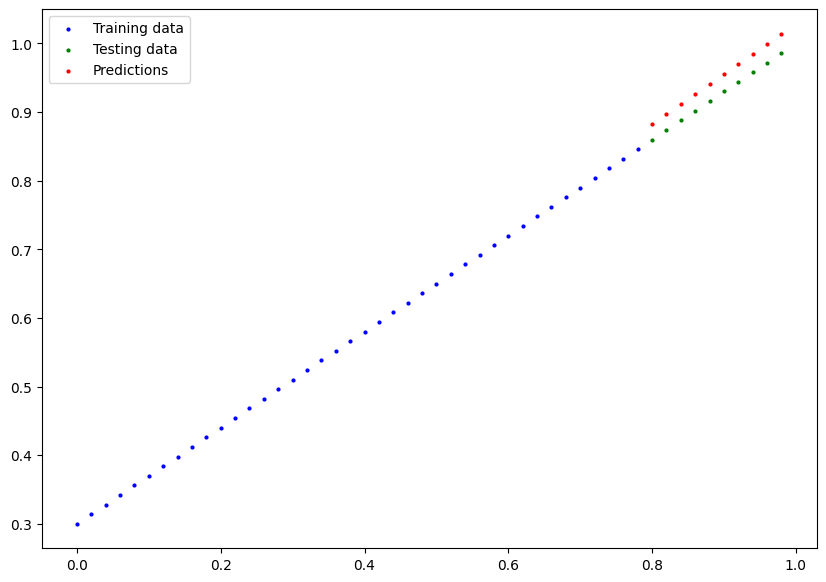

In [ ]:
# Turn on evaluation mode
model_3.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_3(X_test)

plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu()
                 );

Everything adds up! Nice!

Well, we have come a long way to build the first three neural network models in PyTorch!

## Exercises

All exercises have been inspired from code throughout the notebook.

There is one exercise per major section.

You should be able to complete them by referencing their specific section.

> **Note:** For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.
3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

> **Resource:** See the [exercises notebooks templates](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/exercises) and [solutions](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) on the course GitHub.

## Extra-curriculum
* Listen to [The Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw) (to help remember the steps in a PyTorch training/testing loop).
* Read [What is `torch.nn`, really?](https://pytorch.org/tutorials/beginner/nn_tutorial.html) by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works.
* Spend 10-minutes scrolling through and checking out the [PyTorch documentation cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html) for all of the different PyTorch modules you might come across.
* Spend 10-minutes reading the [loading and saving documentation on the PyTorch website](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to become more familiar with the different saving and loading options in PyTorch.
* Spend 1-2 hours read/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
 * [Wikipedia page for gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)
 * [Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) by Robert Kwiatkowski
 * [Gradient descent, how neural networks learn video](https://youtu.be/IHZwWFHWa-w) by 3Blue1Brown
 * [What is backpropagation really doing?](https://youtu.be/Ilg3gGewQ5U) video by 3Blue1Brown
 * [Backpropagation Wikipedia Page](https://en.wikipedia.org/wiki/Backpropagation)


**TO Be INCLUDED to ILusstrate Activation Functions**

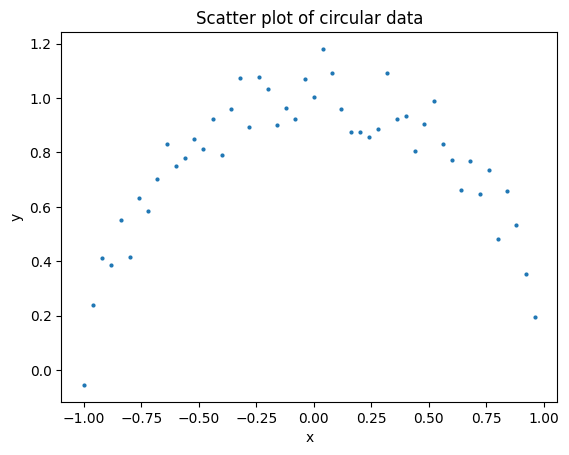

In [ ]:
import torch
import matplotlib.pyplot as plt

X = torch.arange(-1, 1, 0.04)                             # Generate random x values between -1 and 1
y = torch.sqrt(1 - x.pow(2)) + torch.randn(len(x)) * 0.08 # Calculate the corresponding y values

plt.scatter(X.numpy(), y.numpy(), s=4)                    # matplotlib works only on numpy, not on tensor data
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of circular data');

In [ ]:
X = X.unsqueeze(dim=1)
# X

In [ ]:
y = y.unsqueeze(dim=1)
# y

In [ ]:
# Create train/test split
train_split = int(1 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[:train_split], y[:train_split]

len(X_train), len(y_train), len(X_test), len(y_test)

(50, 50, 50, 50)

In [ ]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 1, out_features = 8)  # takes in 2 features (X), produces 8 features
    self.layer_2 = nn.Linear(in_features = 8, out_features = 1)  # takes in 8 features, produces 1 feature (y)

  def forward(self, x):
    z = self.layer_1(x)  # Input goes through layer_1 - > first computation
    z = self.layer_2(z)  # first computation output goes through layer_2 -> second computation
    return z # computation first goes in layer_1 then its output goes in layer_2

In [ ]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 1, out_features = 8)  # takes in 2 features (X), produces 8 features
    self.layer_2 = nn.Linear(in_features = 8, out_features = 1)  # takes in 8 features, produces 1 feature (y)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # computation first goes in layer_1 then its output goes in layer_2

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model_3 = LinearRegressionModelV3().to(device)
model_3

LinearRegressionModelV3(
  (layer_1): Linear(in_features=1, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = LinearRegressionModelV3()
model_3.to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.01)

epochs = 1000

for epoch in range(1, epochs + 1):
  model_3.train()                   #    train mode is on by default after construction
  y_pred = model_3(X_train)         # 1. Forward pass
  loss = criterion(y_pred, y_train) # 2. Calculate loss
  loss.backward()                   # 4. Loss backward
  optimizer.step()                  # 5. Step the optimizer
  optimizer.zero_grad()             # 3. Zero grad optimizer

  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test)              # 1. Forward pass
    test_loss = criterion(test_pred, y_test) # 2. Calculate loss

  if epoch % 50 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(test_loss.cpu().detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 50 | MAE Train Loss: 0.20683567225933075 | MAE Test Loss: 0.2060771882534027 
Epoch: 100 | MAE Train Loss: 0.19250266253948212 | MAE Test Loss: 0.19249394536018372 
Epoch: 150 | MAE Train Loss: 0.19206832349300385 | MAE Test Loss: 0.19205962121486664 
Epoch: 200 | MAE Train Loss: 0.19180496037006378 | MAE Test Loss: 0.19173821806907654 
Epoch: 250 | MAE Train Loss: 0.1917361468076706 | MAE Test Loss: 0.1917399913072586 
Epoch: 300 | MAE Train Loss: 0.19173574447631836 | MAE Test Loss: 0.19180606305599213 
Epoch: 350 | MAE Train Loss: 0.1917373239994049 | MAE Test Loss: 0.19173739850521088 
Epoch: 400 | MAE Train Loss: 0.19173909723758698 | MAE Test Loss: 0.19173501431941986 
Epoch: 450 | MAE Train Loss: 0.19180719554424286 | MAE Test Loss: 0.19173642992973328 
Epoch: 500 | MAE Train Loss: 0.19173866510391235 | MAE Test Loss: 0.19173818826675415 
Epoch: 550 | MAE Train Loss: 0.19173619151115417 | MAE Test Loss: 0.19173996150493622 
Epoch: 600 | MAE Train Loss: 0.19173553586006165

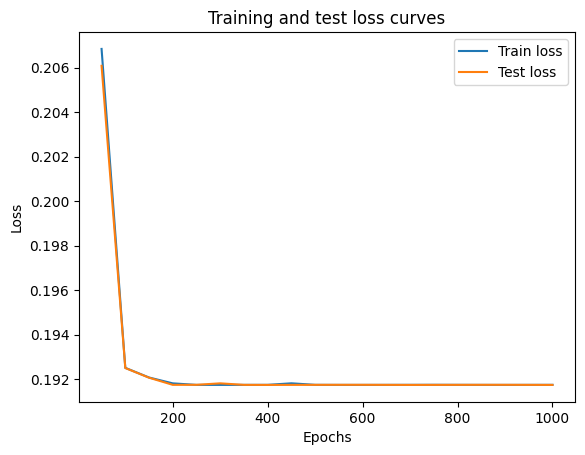

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

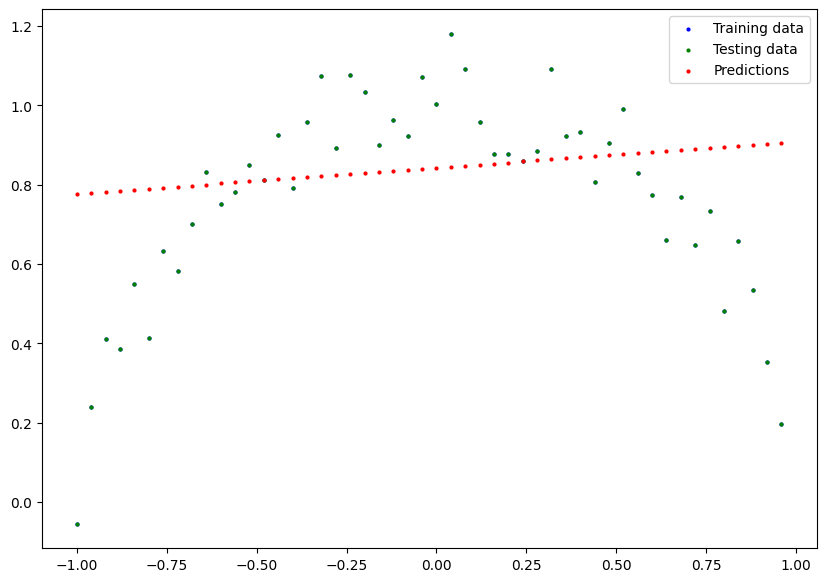

In [ ]:
# Turn on evaluation mode
model_3.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_3(X_test)

plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu()
                 );

In [ ]:
model_3 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 8),
    nn.ReLU(),
    nn.Linear(in_features = 8, out_features = 1),
    nn.ReLU()
    )

model_3.to(device)

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): ReLU()
)

In [ ]:
model_3.to(device)
model_3

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): ReLU()
)

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# model_3 = LinearRegressionModelV3()
model_3.to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.01)

epochs = 1000

for epoch in range(1, epochs + 1):
  model_3.train()                   #    train mode is on by default after construction
  y_pred = model_3(X_train)         # 1. Forward pass
  loss = criterion(y_pred, y_train) # 2. Calculate loss
  loss.backward()                   # 4. Loss backward
  optimizer.step()                  # 5. Step the optimizer
  optimizer.zero_grad()             # 3. Zero grad optimizer

  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test)              # 1. Forward pass
    test_loss = criterion(test_pred, y_test) # 2. Calculate loss

  if epoch % 50 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(test_loss.cpu().detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 50 | MAE Train Loss: 0.26894956827163696 | MAE Test Loss: 0.26631060242652893 
Epoch: 100 | MAE Train Loss: 0.23147925734519958 | MAE Test Loss: 0.23124220967292786 
Epoch: 150 | MAE Train Loss: 0.2195124328136444 | MAE Test Loss: 0.2192794382572174 
Epoch: 200 | MAE Train Loss: 0.20832793414592743 | MAE Test Loss: 0.20813104510307312 
Epoch: 250 | MAE Train Loss: 0.19877873361110687 | MAE Test Loss: 0.19857347011566162 
Epoch: 300 | MAE Train Loss: 0.18876692652702332 | MAE Test Loss: 0.1885564774274826 
Epoch: 350 | MAE Train Loss: 0.17863647639751434 | MAE Test Loss: 0.17843906581401825 
Epoch: 400 | MAE Train Loss: 0.16820131242275238 | MAE Test Loss: 0.16797587275505066 
Epoch: 450 | MAE Train Loss: 0.1575823724269867 | MAE Test Loss: 0.15738274157047272 
Epoch: 500 | MAE Train Loss: 0.14701387286186218 | MAE Test Loss: 0.14679880440235138 
Epoch: 550 | MAE Train Loss: 0.1360701322555542 | MAE Test Loss: 0.1358630508184433 
Epoch: 600 | MAE Train Loss: 0.12611240148544312 |

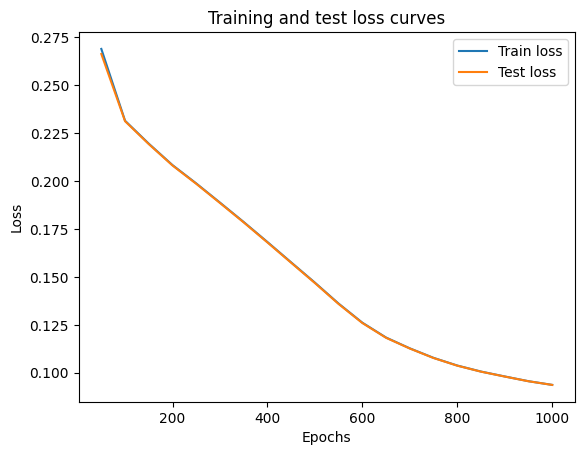

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

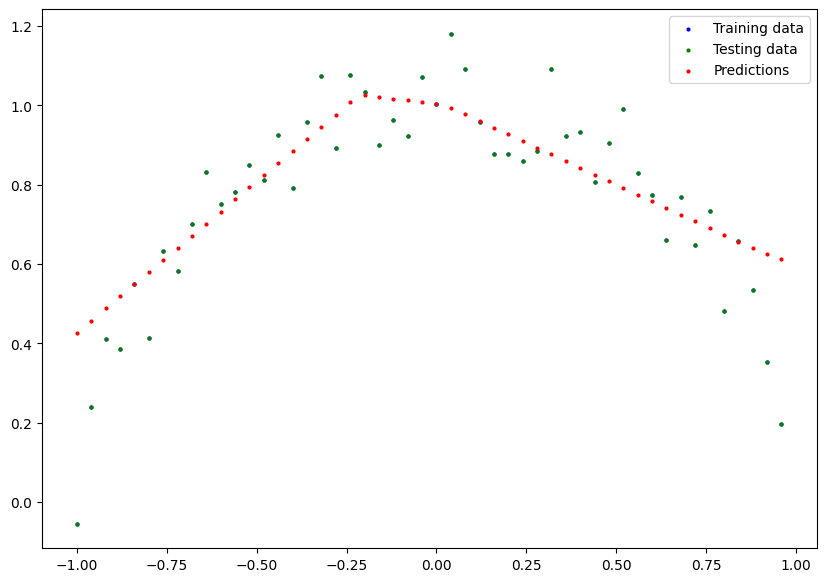

In [ ]:
# Turn on evaluation mode
model_3.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_3(X_test)

plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu()
                 );